In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

In [2]:
data=pd.read_csv('delhiaqi.csv')

In [3]:
data.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [4]:
data.tail()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
556,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
557,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
558,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
559,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47
560,2023-01-24 08:00:00,1134.87,8.61,56.89,80.11,110.63,123.76,140.26,5.51


In [5]:
data.shape

(561, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB


In [7]:
data.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,3814.942210,51.181979,75.292496,30.141943,64.655936,358.256364,420.988414,26.425062
std,3227.744681,83.904476,42.473791,39.979405,61.073080,227.359117,271.287026,36.563094
min,654.220000,0.000000,13.370000,0.000000,5.250000,60.100000,69.080000,0.630000
25%,1708.980000,3.380000,44.550000,0.070000,28.130000,204.450000,240.900000,8.230000
50%,2590.180000,13.300000,63.750000,11.800000,47.210000,301.170000,340.900000,14.820000
75%,4432.680000,59.010000,97.330000,47.210000,77.250000,416.650000,482.570000,26.350000
max,16876.220000,425.580000,263.210000,164.510000,511.170000,1310.200000,1499.270000,267.510000


In [8]:
data["date"] = pd.to_datetime(data["date"], format="%Y-%m-%d %H:%M:%S")

In [9]:
data['date']

0     2023-01-01 00:00:00
1     2023-01-01 01:00:00
2     2023-01-01 02:00:00
3     2023-01-01 03:00:00
4     2023-01-01 04:00:00
              ...        
556   2023-01-24 04:00:00
557   2023-01-24 05:00:00
558   2023-01-24 06:00:00
559   2023-01-24 07:00:00
560   2023-01-24 08:00:00
Name: date, Length: 561, dtype: datetime64[ns]

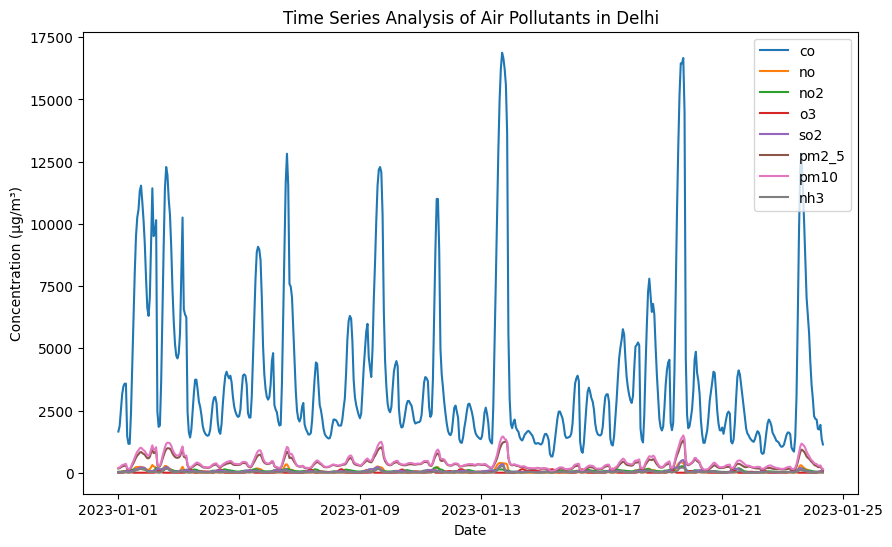

In [10]:
plt.figure(figsize=(10, 6))
for pollutant in ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']:
    sns.lineplot(x='date', y=pollutant, data=data, label=pollutant)
plt.title('Time Series Analysis of Air Pollutants in Delhi')
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.show()

In [11]:
pollutants = data[['co', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']].sum()

([<matplotlib.patches.Wedge at 0x7b6428f3b460>,
 [Text(-0.8823887735726856, 0.6568029021501746, 'co'),
  Text(0.36727634684128235, -1.0368741895962703, 'no2'),
  Text(0.4380318344599915, -1.009023345616748, 'o3'),
  Text(0.4998717402337833, -0.9798613388207789, 'so2'),
  Text(0.749048612490199, -0.8055595422602277, 'pm2_5'),
  Text(1.0473222062840684, -0.3363275133322747, 'pm10'),
  Text(1.09983484786791, -0.01906062473717321, 'nh3')])

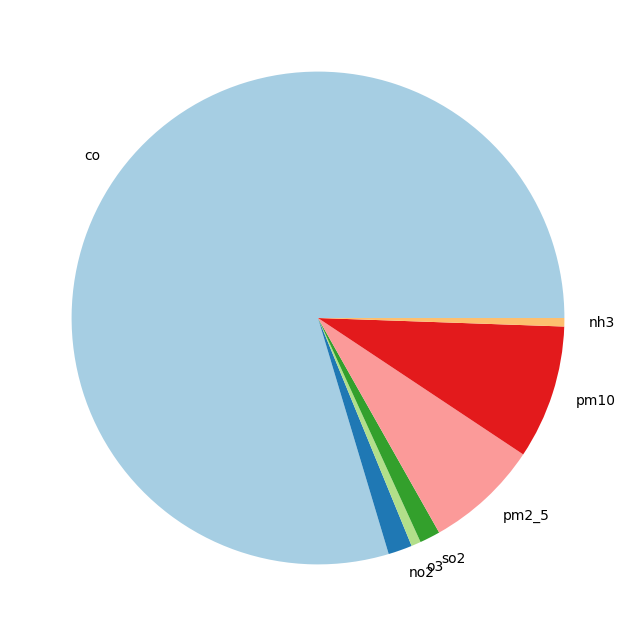

In [12]:
plt.figure(figsize=(8, 8))
sns.set_palette("Paired")
plt.pie(pollutants, labels=pollutants.index)

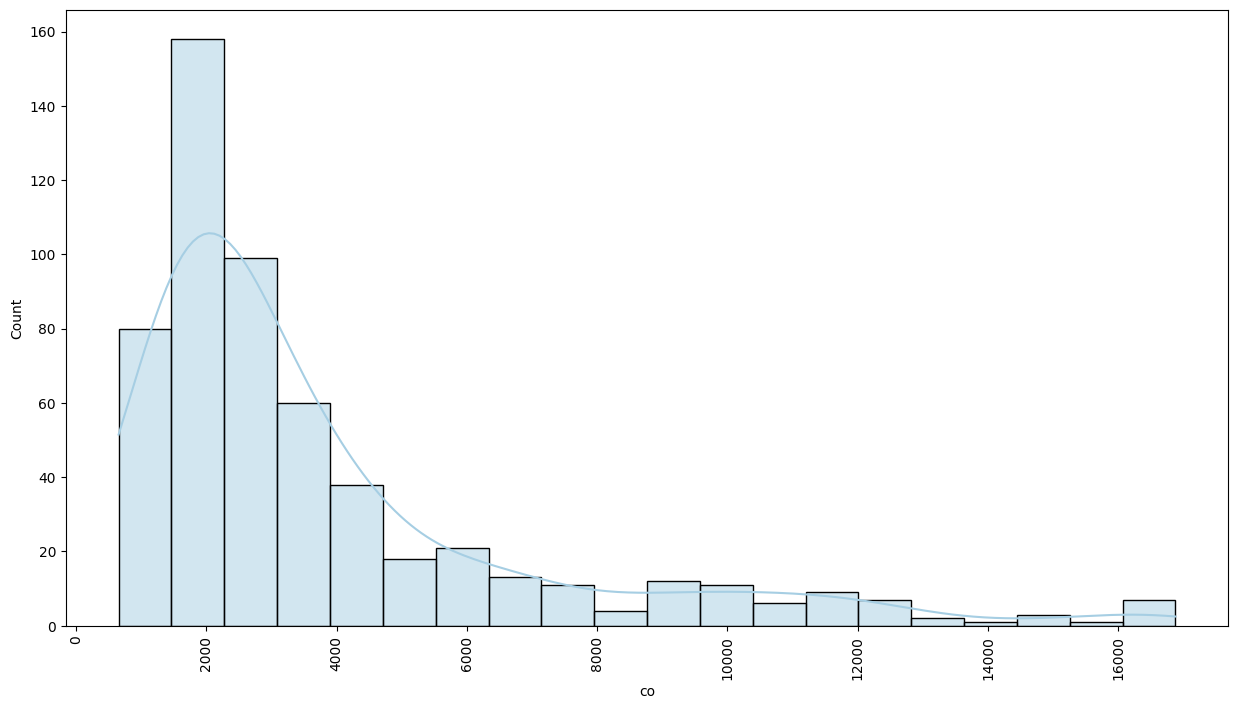

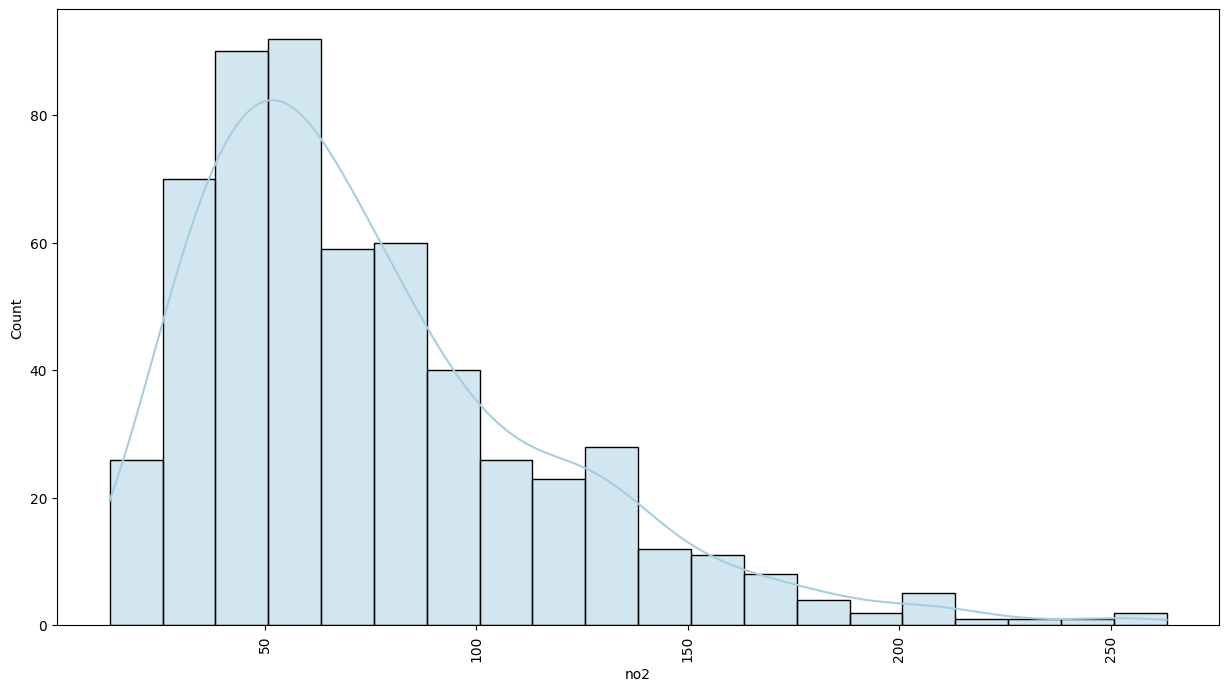

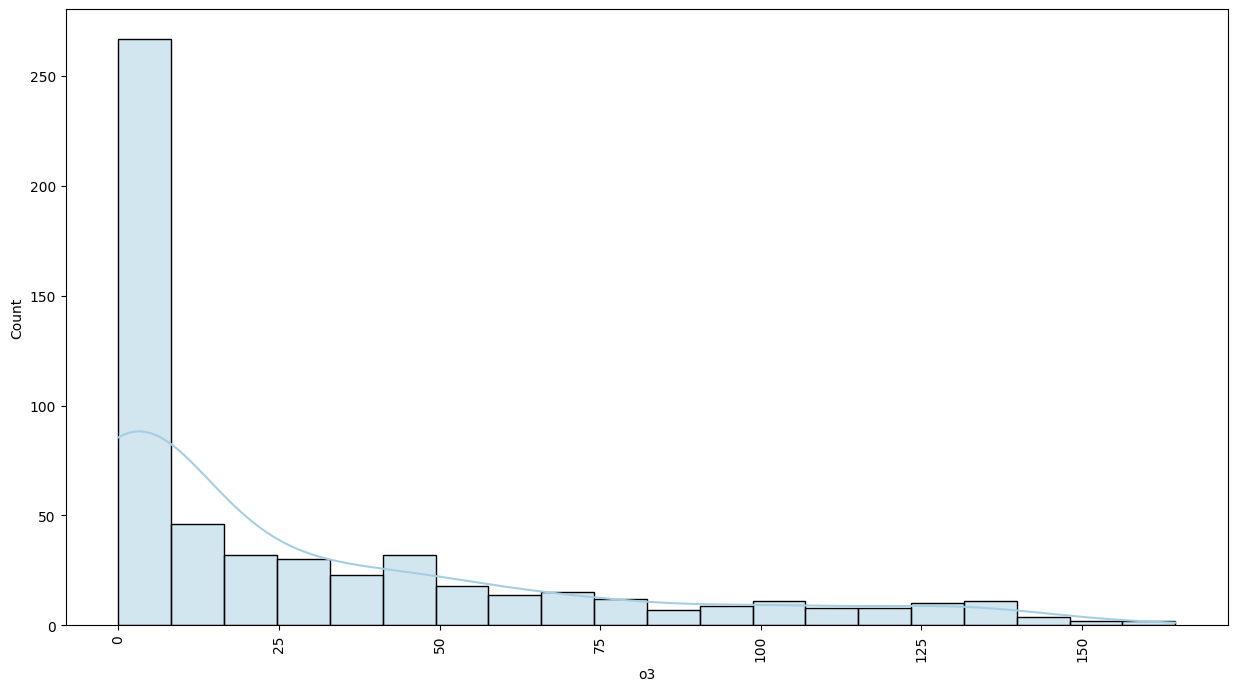

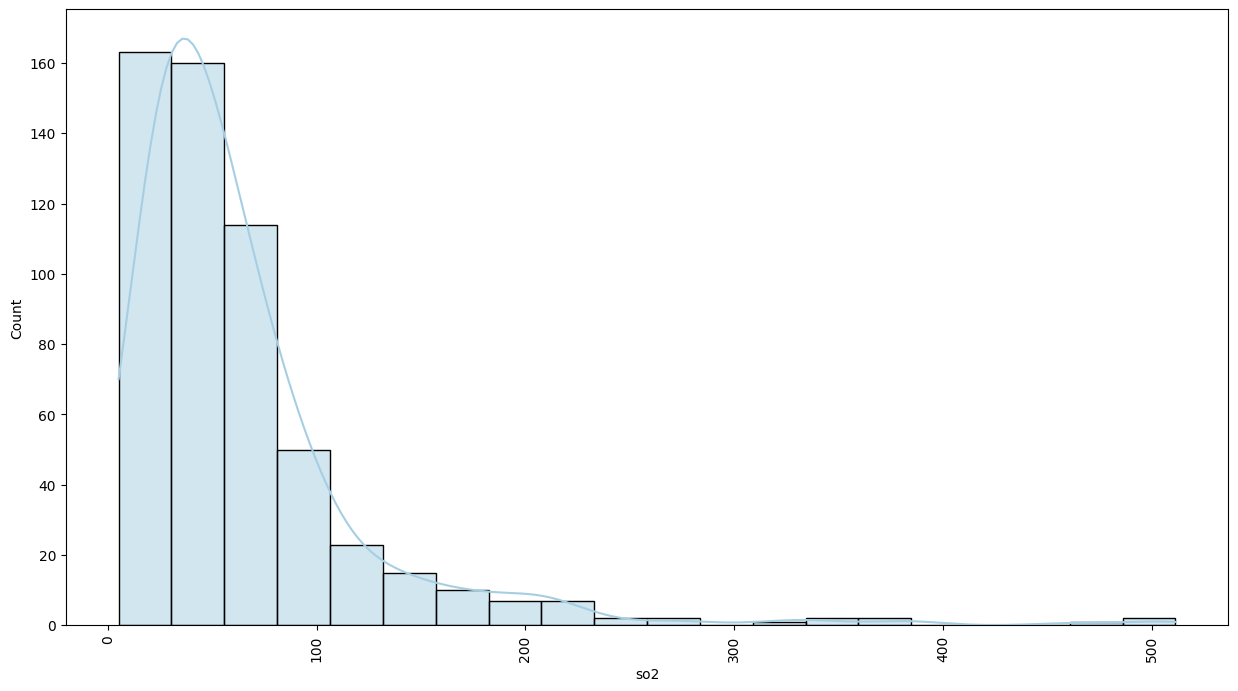

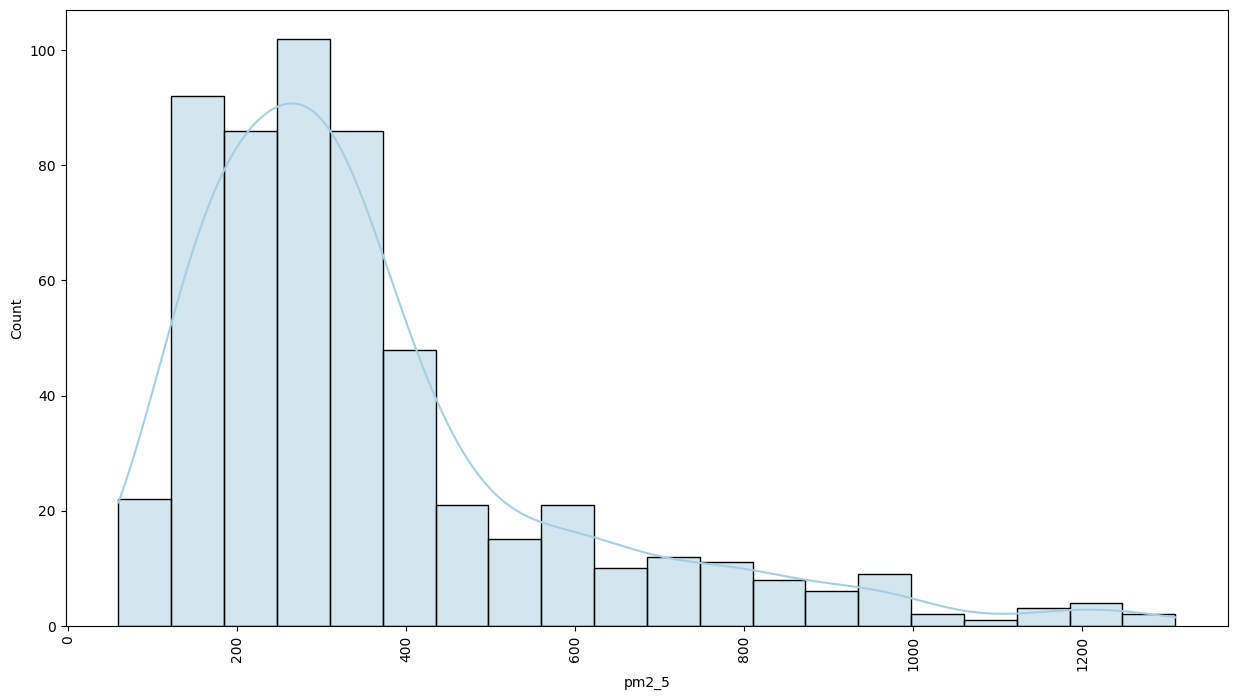

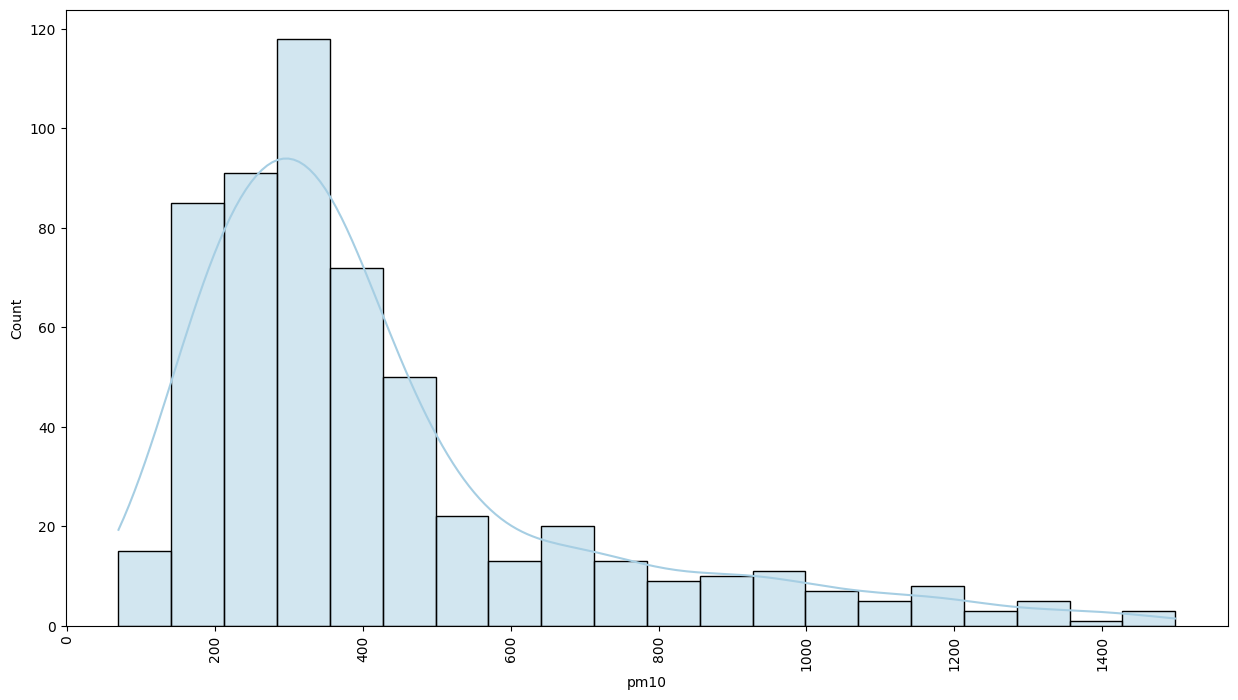

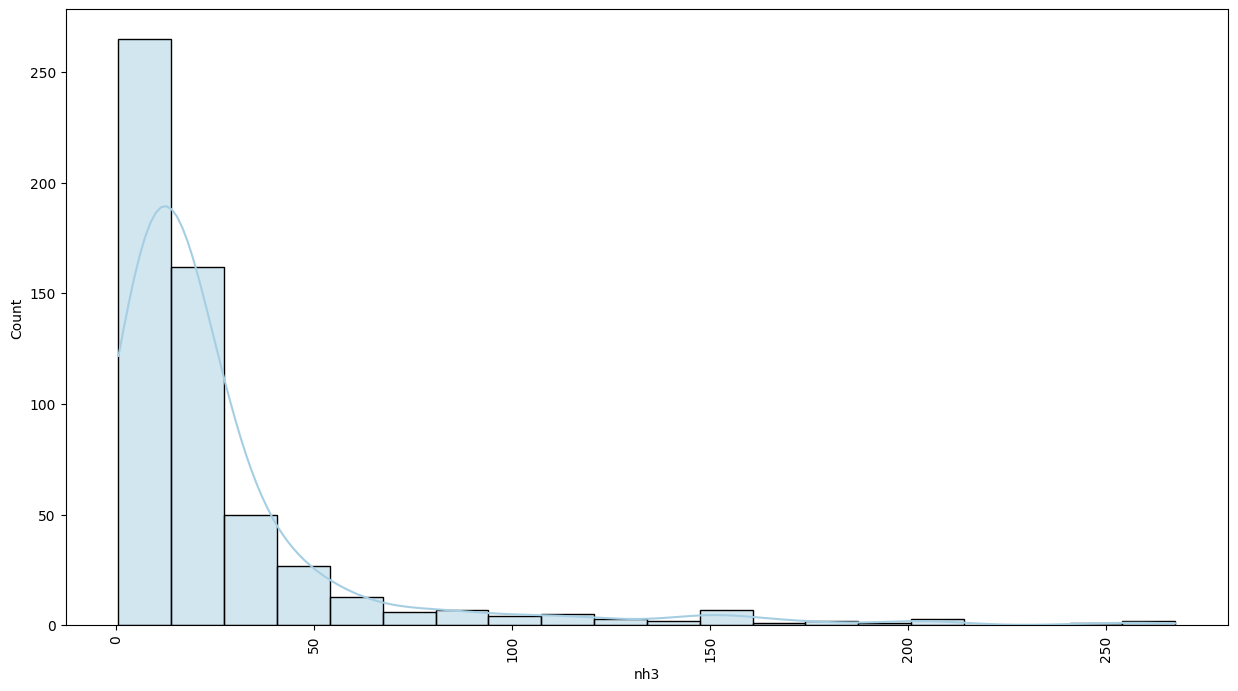

In [13]:
pollutants = ['co', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

for pollutant in pollutants:

    plt.figure(figsize=(15,8))

    sns.histplot(data[pollutant], kde=True, bins=20)

    plt.xticks(rotation=90)

    plt.show()


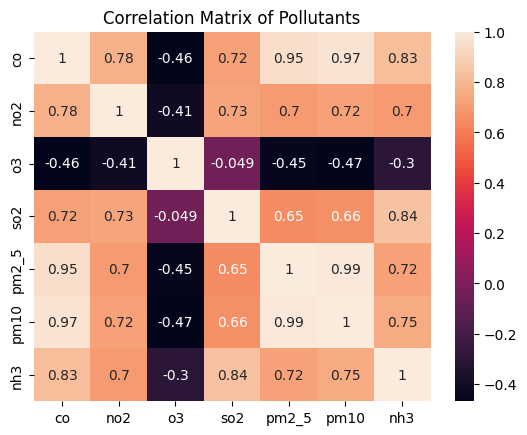

In [14]:
correlation_matrix = data[pollutants].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Pollutants')
plt.show()

In [15]:
aqi_breakpoints = [
    (0, 12.0, 50), (12.1, 35.4, 100), (35.5, 55.4, 150),
    (55.5, 150.4, 200), (150.5, 250.4, 300), (250.5, 350.4, 400),
    (350.5, 500.4, 500)
]

def calculate_aqi(pollutant_name, concentration):
    for low, high, aqi in aqi_breakpoints:
        if low <= concentration <= high:
            return aqi
    return None

def calculate_overall_aqi(row):
    aqi_values = []
    pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
    for pollutant in pollutants:
        aqi = calculate_aqi(pollutant, row[pollutant])
        if aqi is not None:
            aqi_values.append(aqi)
    return max(aqi_values)

data['AQI'] = data.apply(calculate_overall_aqi, axis=1)
aqi_categories = [
    (0, 50, 'Good'), (51, 100, 'Moderate'), (101, 150, 'Unhealthy for Sensitive Groups'),
    (151, 200, 'Unhealthy'), (201, 300, 'Very Unhealthy'), (301, 500, 'Hazardous')
]

def categorize_aqi(aqi_value):
    for low, high, category in aqi_categories:
        if low <= aqi_value <= high:
            return category
    return None
data['AQI Category'] = data['AQI'].apply(categorize_aqi)
data.head(50)

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,AQI,AQI Category
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83,300,Very Unhealthy
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66,300,Very Unhealthy
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40,400,Hazardous
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55,400,Hazardous
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19,400,Hazardous
5,2023-01-01 05:00:00,3578.19,64.37,55.52,14.13,44.35,276.54,336.79,16.21,400,Hazardous
6,2023-01-01 06:00:00,3578.19,46.94,76.09,33.26,50.54,295.40,357.07,19.25,500,Hazardous
7,2023-01-01 07:00:00,1468.66,9.83,47.30,105.86,68.66,158.83,182.61,7.09,300,Very Unhealthy
8,2023-01-01 08:00:00,1161.58,5.81,35.99,125.89,61.99,134.39,153.47,5.51,300,Very Unhealthy
9,2023-01-01 09:00:00,1161.58,4.58,36.33,134.47,65.80,133.22,152.09,6.02,300,Very Unhealthy


In [16]:
data['hour']=data['date'].dt.hour
hourly_avg= data.groupby('hour')['AQI'].mean().reset_index()

In [17]:
hourly_avg

,hour,AQI
0,0,362.500000
1,1,370.833333
2,2,400.000000
3,3,408.333333
4,4,412.500000
5,5,408.333333
6,6,408.333333
7,7,350.000000
8,8,329.166667
9,9,317.391304


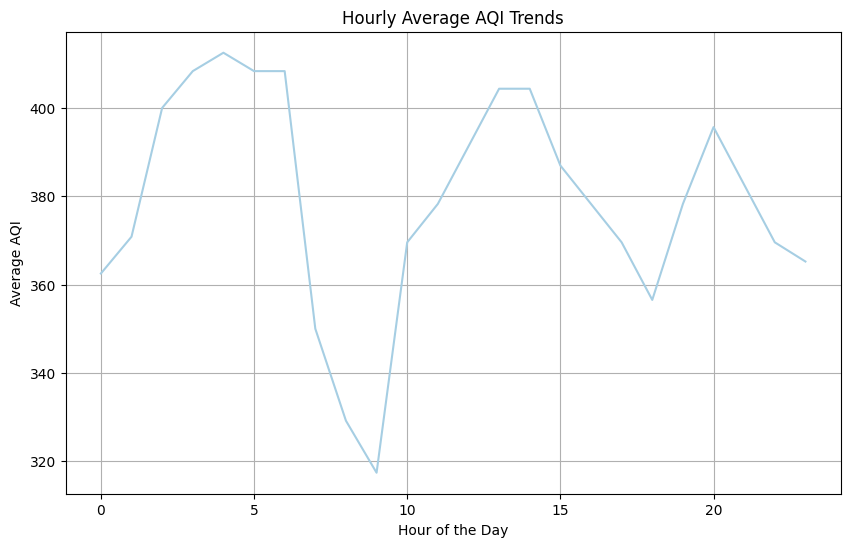

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg.hour, hourly_avg.AQI)
plt.title('Hourly Average AQI Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Average AQI')
plt.grid(True)
plt.show()

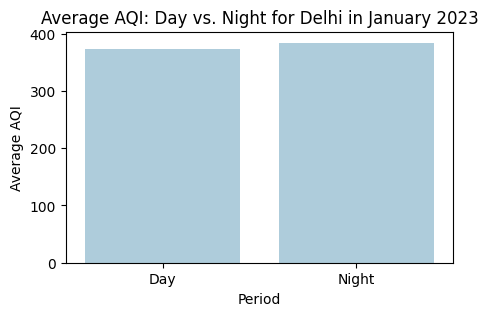

In [19]:
day_hours = (6, 18)
night_hours = (18, 6)

daytime_data = data[(data['hour'] >= day_hours[0]) & (data['hour'] < day_hours[1])]
nighttime_data = data[(data['hour'] >= night_hours[0]) | (data['hour'] < night_hours[1])]

average_day_aqi = daytime_data['AQI'].mean()
average_night_aqi = nighttime_data['AQI'].mean()
day_night_aqi_comparison = pd.DataFrame({
    'Period': ['Day', 'Night'],
    'Average AQI': [average_day_aqi, average_night_aqi]
})


plt.figure(figsize=(5, 3))
sns.barplot(x='Period', y='Average AQI', data=day_night_aqi_comparison)
plt.title('Average AQI: Day vs. Night for Delhi in January 2023')
plt.ylabel('Average AQI')
plt.show()